In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import os 
import plotly.express as px
import matplotlib.pyplot as plt
from utilities import *
from datetime import datetime 
from scipy.stats import linregress

In [2]:
df = pd.read_excel('Project_7_Dataset.xlsx')
df.head()

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway MPG  city mpg  Popularity   MSRP  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

In [3]:
df.shape

(11914, 16)

In [33]:
for x in df.columns:
    print(x, df[x].nunique())

Make 47
Model 712
Year 28
Engine Fuel Type 8
Engine HP 327
Engine Cylinders 9
Transmission Type 5
Driven_Wheels 4
Number of Doors 3
Market Category 70
Vehicle Size 3
Vehicle Style 16
highway MPG 44
city mpg 50
Popularity 47
MSRP 4644


In [4]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [5]:
clean_data(df)
df.shape

(8084, 16)

In [6]:
num_col = [x for x in df.columns if df[x].dtypes != 'object']
cat_col = [x for x  in df.columns if x not in num_col]
cat_col_corr = cat_col.copy()
cat_col_corr.append('MSRP')


In [7]:
print(f'num_col : {num_col} \n cat_col : {cat_col} \n cat_col_corr : {cat_col_corr}')

num_col : ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP'] 
 cat_col : ['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style'] 
 cat_col_corr : ['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style', 'MSRP']


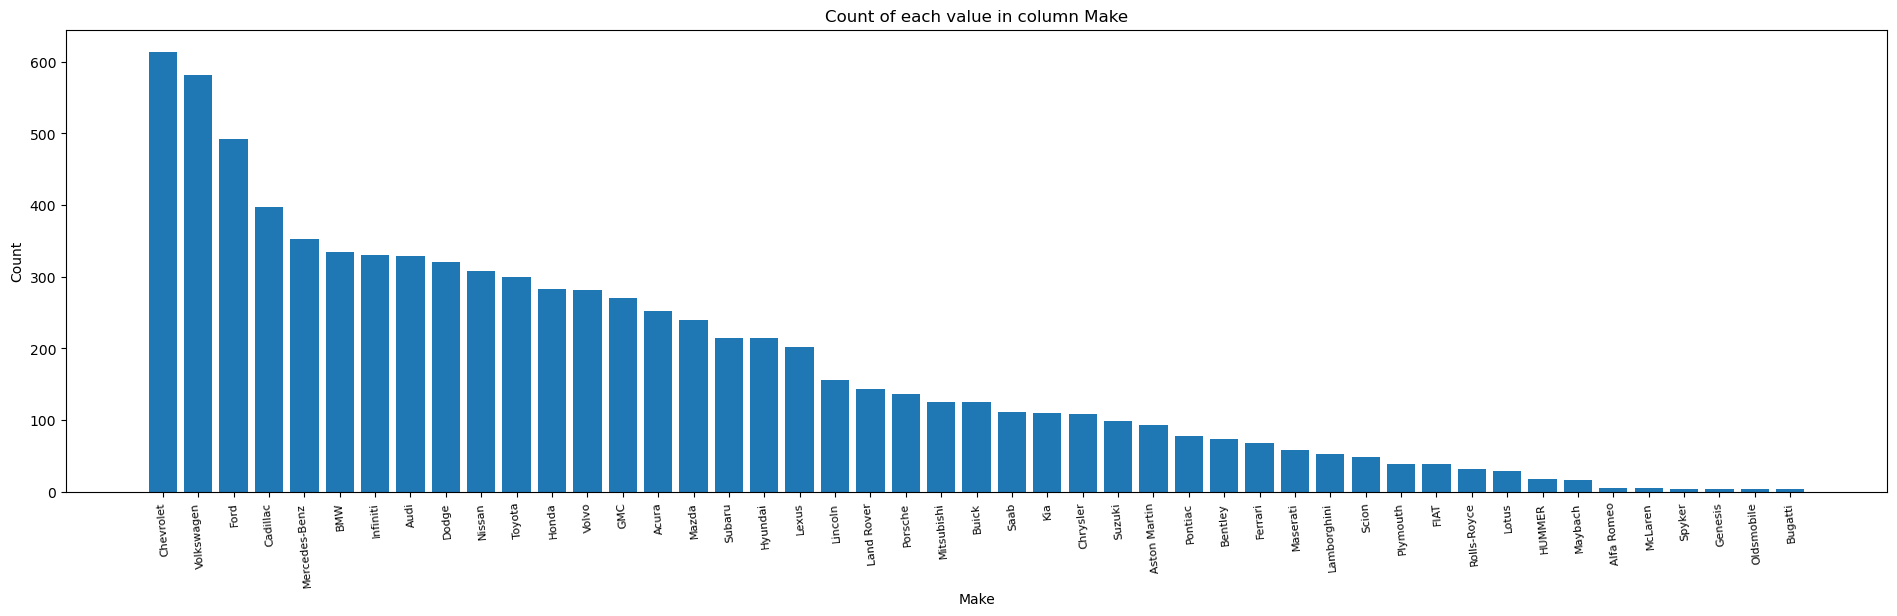

Values count of each categorical column Make:
Make
Chevrolet        614
Volkswagen       581
Ford             492
Cadillac         397
Mercedes-Benz    352
BMW              334
Infiniti         330
Audi             328
Dodge            320
Nissan           308
Toyota           300
Honda            282
Volvo            281
GMC              270
Acura            252
Mazda            239
Subaru           214
Hyundai          214
Lexus            202
Lincoln          156
Land Rover       143
Porsche          136
Mitsubishi       125
Buick            125
Saab             111
Kia              109
Chrysler         108
Suzuki            99
Aston Martin      93
Pontiac           77
Bentley           74
Ferrari           68
Maserati          58
Lamborghini       52
Scion             48
Plymouth          39
FIAT              38
Rolls-Royce       31
Lotus             29
HUMMER            17
Maybach           16
Alfa Romeo         5
McLaren            5
Spyker             3
Genesis            3
Olds

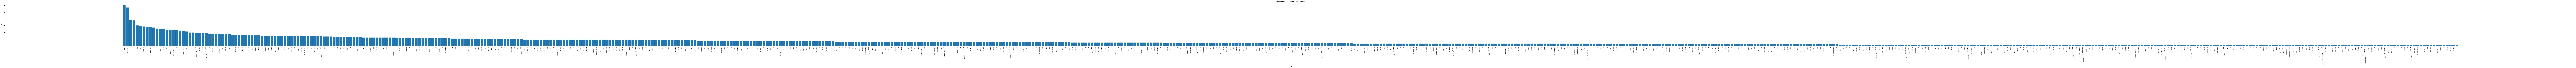

Values count of each categorical column Model:
Model
F-150             122
Silverado 1500    114
GTI                76
Beetle             75
Corvette           60
                 ... 
LFA                 1
Lancer              1
Intrepid            1
Horizon             1
Zephyr              1
Name: count, Length: 712, dtype: int64


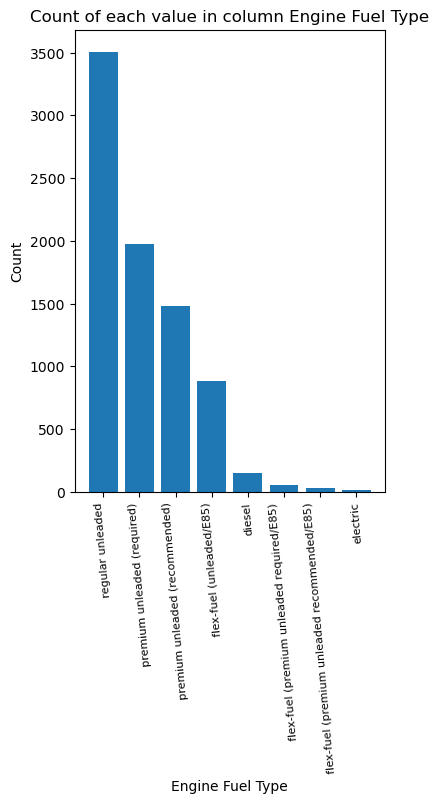

Values count of each categorical column Engine Fuel Type:
Engine Fuel Type
regular unleaded                                3507
premium unleaded (required)                     1973
premium unleaded (recommended)                  1477
flex-fuel (unleaded/E85)                         881
diesel                                           153
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
electric                                          13
Name: count, dtype: int64


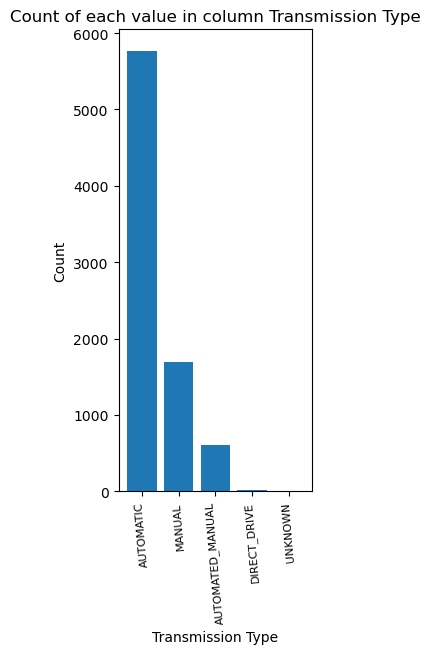

Values count of each categorical column Transmission Type:
Transmission Type
AUTOMATIC           5761
MANUAL              1695
AUTOMATED_MANUAL     610
DIRECT_DRIVE          15
UNKNOWN                3
Name: count, dtype: int64


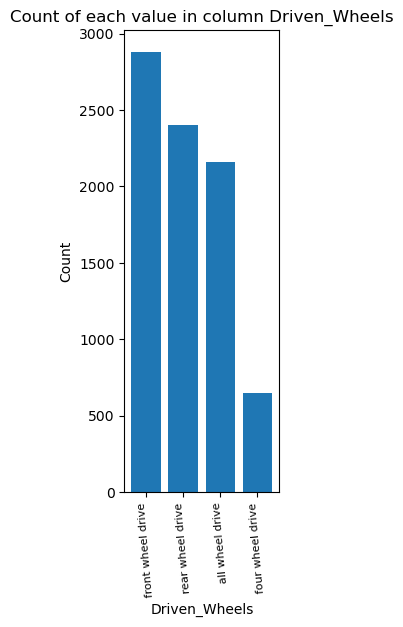

Values count of each categorical column Driven_Wheels:
Driven_Wheels
front wheel drive    2879
rear wheel drive     2401
all wheel drive      2158
four wheel drive      646
Name: count, dtype: int64


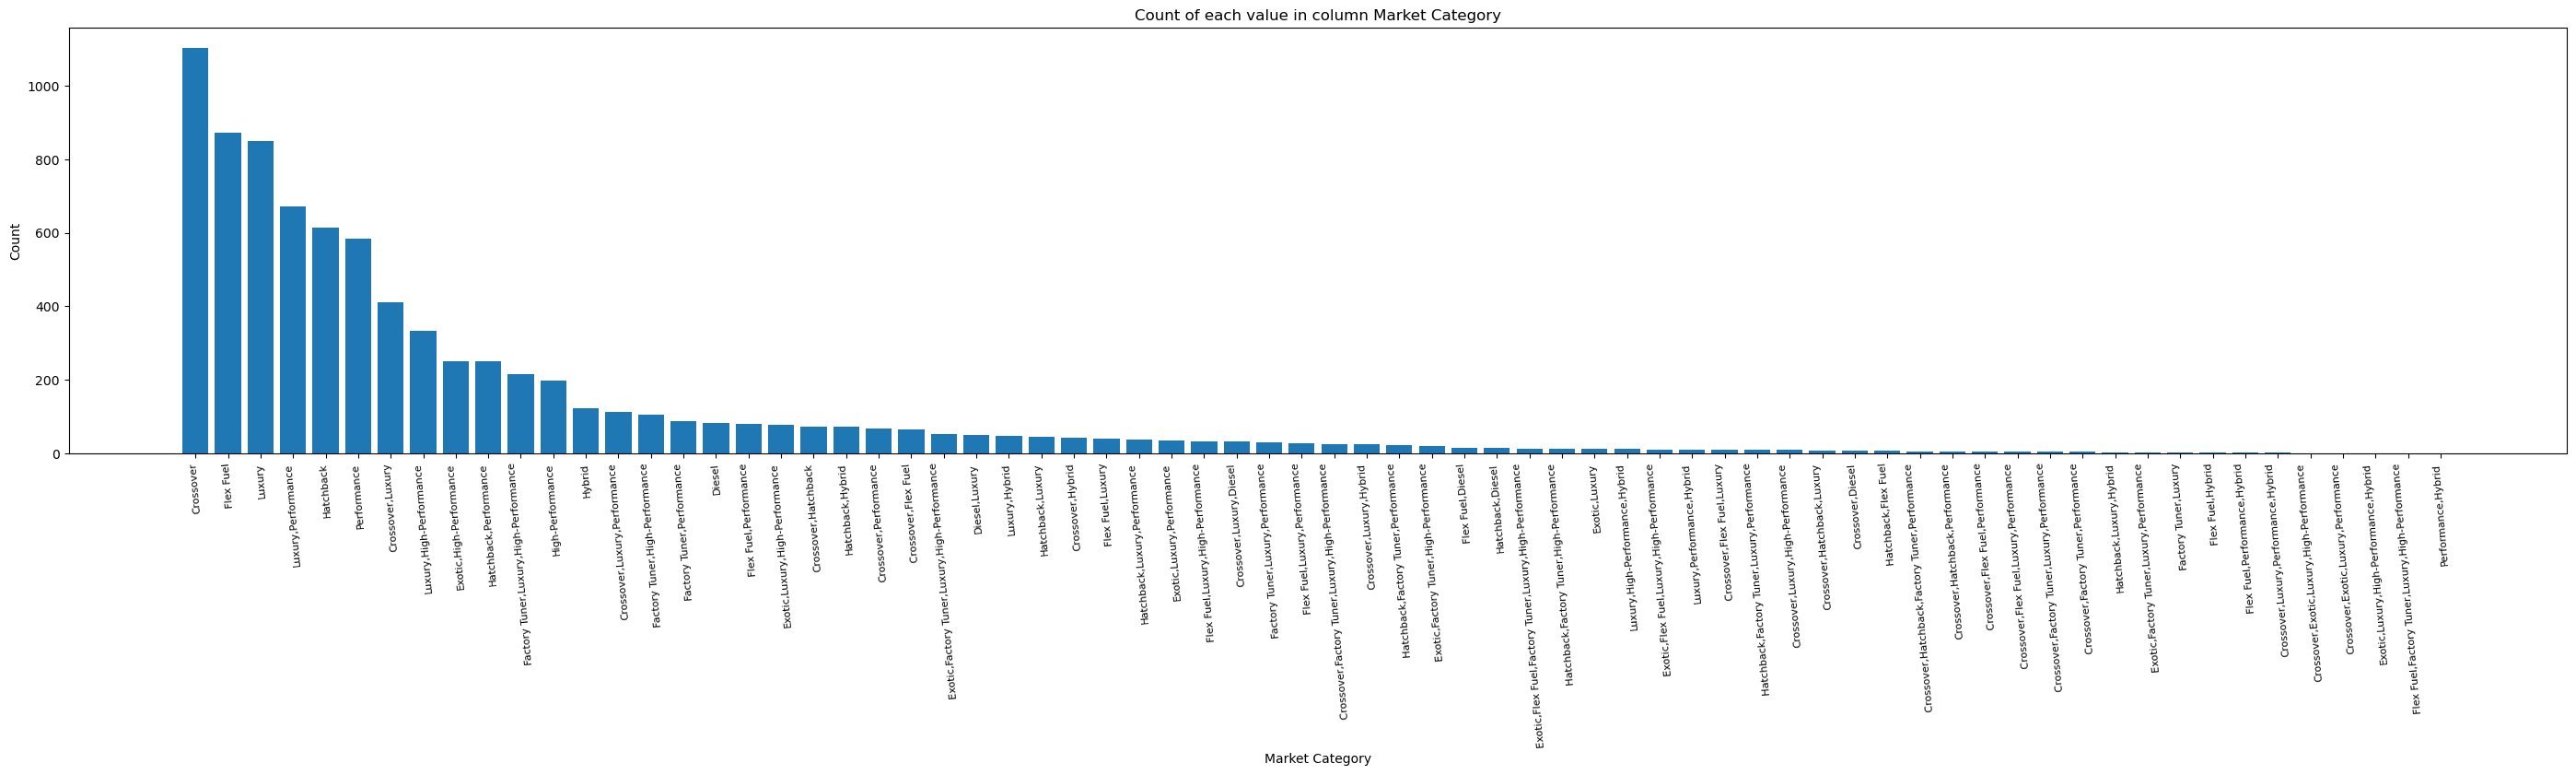

Values count of each categorical column Market Category:
Market Category
Crossover                                          1103
Flex Fuel                                           872
Luxury                                              851
Luxury,Performance                                  673
Hatchback                                           614
                                                   ... 
Crossover,Exotic,Luxury,High-Performance              1
Crossover,Exotic,Luxury,Performance                   1
Exotic,Luxury,High-Performance,Hybrid                 1
Flex Fuel,Factory Tuner,Luxury,High-Performance       1
Performance,Hybrid                                    1
Name: count, Length: 70, dtype: int64


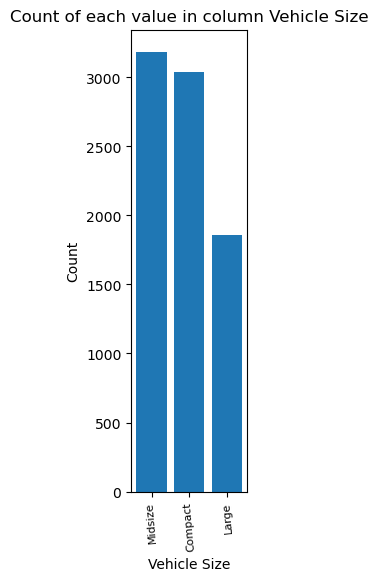

Values count of each categorical column Vehicle Size:
Vehicle Size
Midsize    3187
Compact    3039
Large      1858
Name: count, dtype: int64


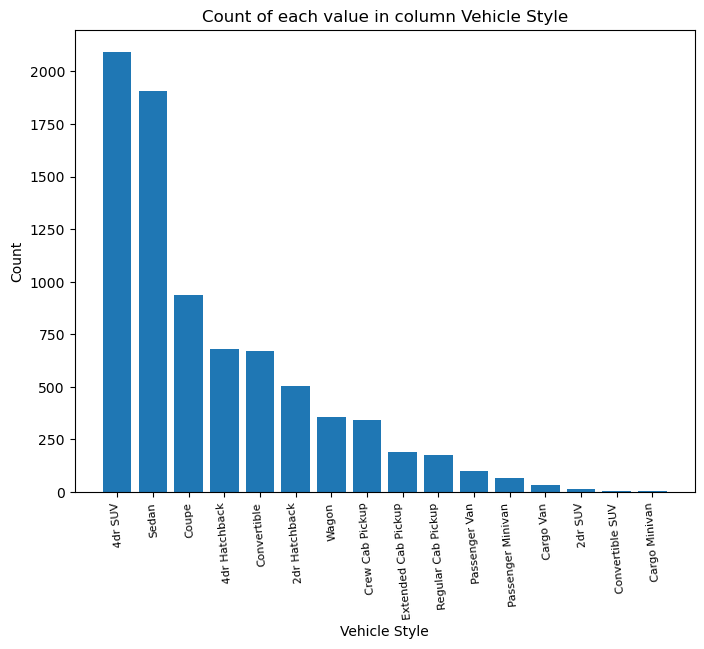

Values count of each categorical column Vehicle Style:
Vehicle Style
4dr SUV                2093
Sedan                  1909
Coupe                   939
4dr Hatchback           678
Convertible             670
2dr Hatchback           503
Wagon                   357
Crew Cab Pickup         344
Extended Cab Pickup     191
Regular Cab Pickup      176
Passenger Van           100
Passenger Minivan        65
Cargo Van                34
2dr SUV                  14
Convertible SUV           6
Cargo Minivan             5
Name: count, dtype: int64


In [8]:
for x in cat_col:
    counts = df[x].value_counts()

    # Plot the values and their counts
    plt.figure(figsize=(len(counts) * 0.5, 6))  # Adjust figure size based on unique values
    plt.bar(counts.index.astype(str), counts.values)  # Convert index to strings

    # Set x-axis label font size and rotation
    plt.xticks(rotation=95, fontsize=8)

    plt.xlabel(f'{x}')
    plt.ylabel('Count')
    plt.title(f'Count of each value in column {x}')
    plt.show()

    print(f"Values count of each categorical column {x}:\n{counts}")

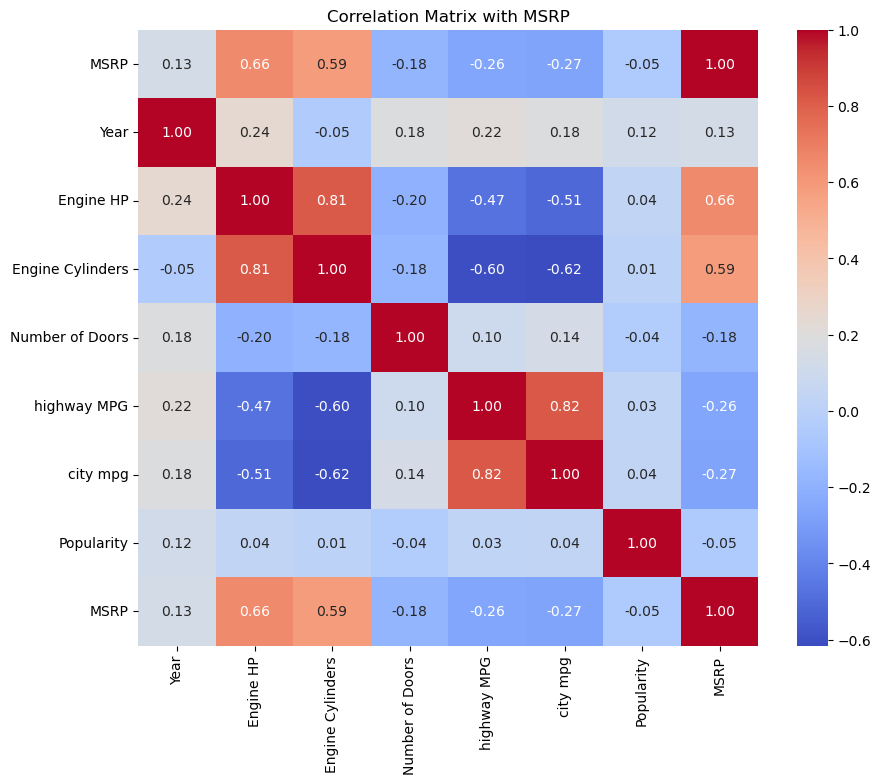

In [9]:
num_df = df[num_col]
correlation_matrix = num_df.corr()

# Sort correlations with MSRP
msrp_correlation = correlation_matrix['MSRP'].sort_values(ascending=False)

# Filter the correlation matrix to include only 'MSRP' and other numerical columns
correlation_with_msrp = correlation_matrix.loc[['MSRP'] + num_col]

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_msrp, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix with MSRP')
plt.show()

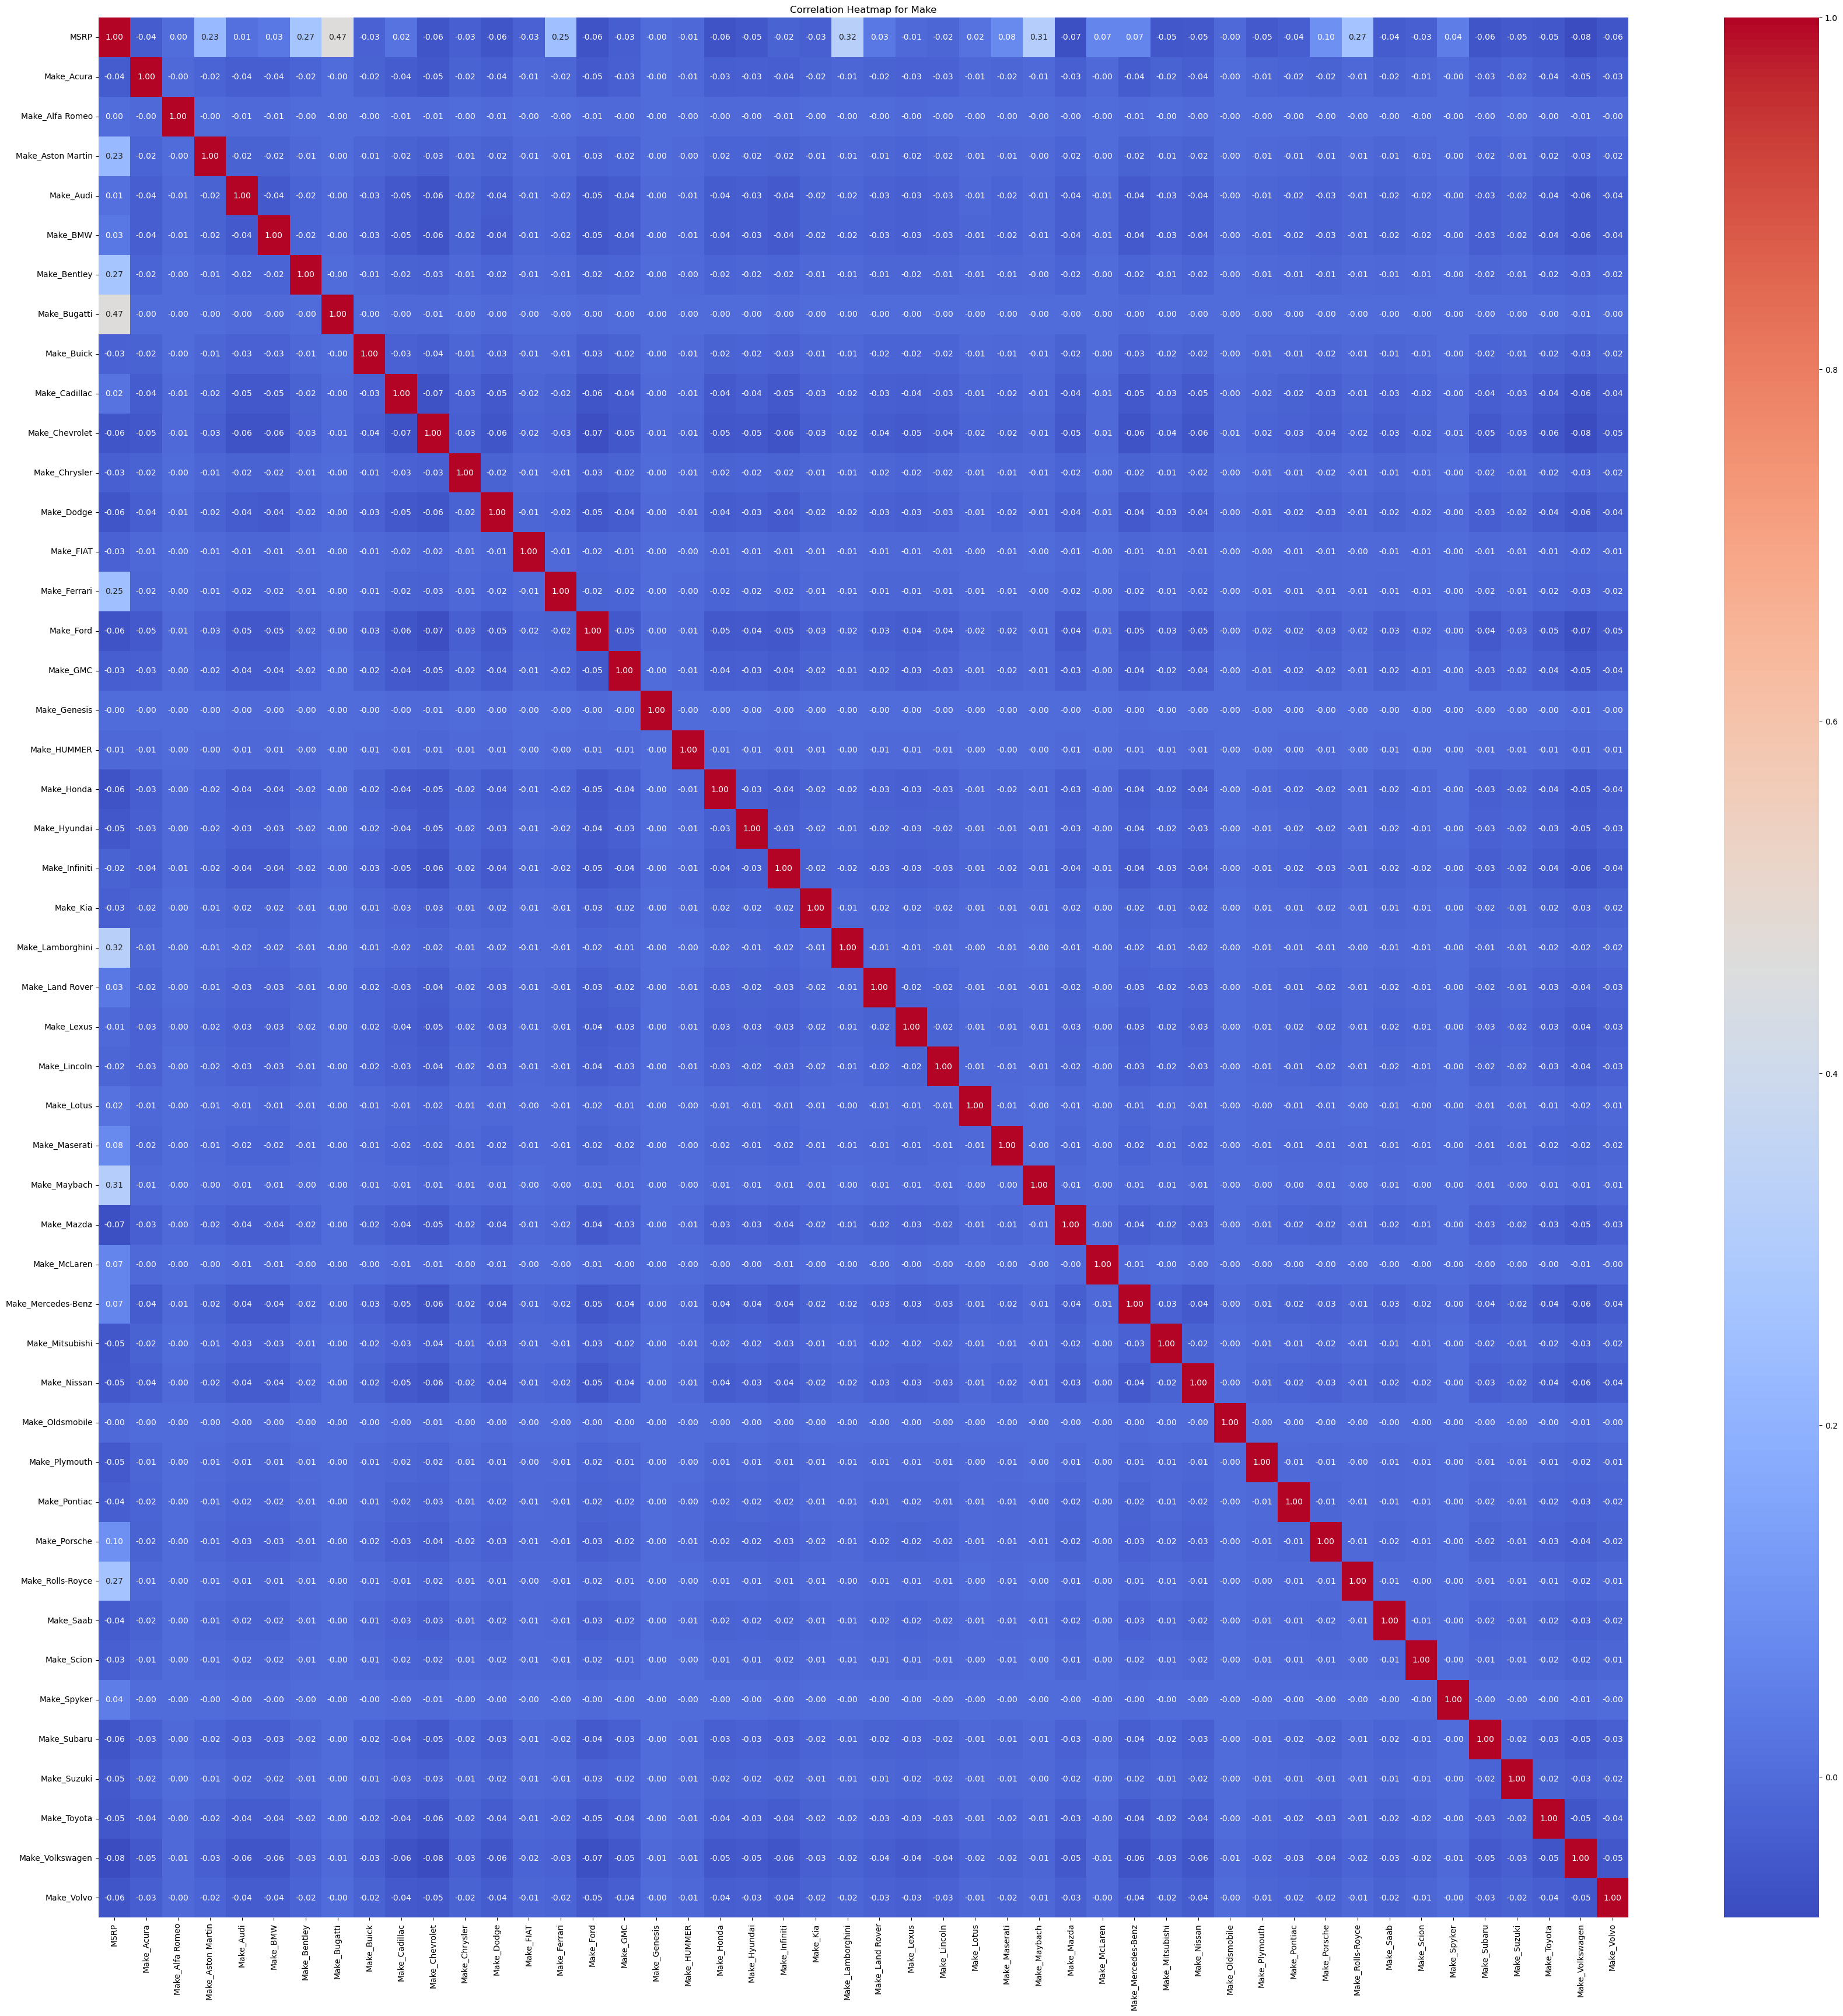

Number of unique values for Model exceeds the maximum limit. Skipping plot.


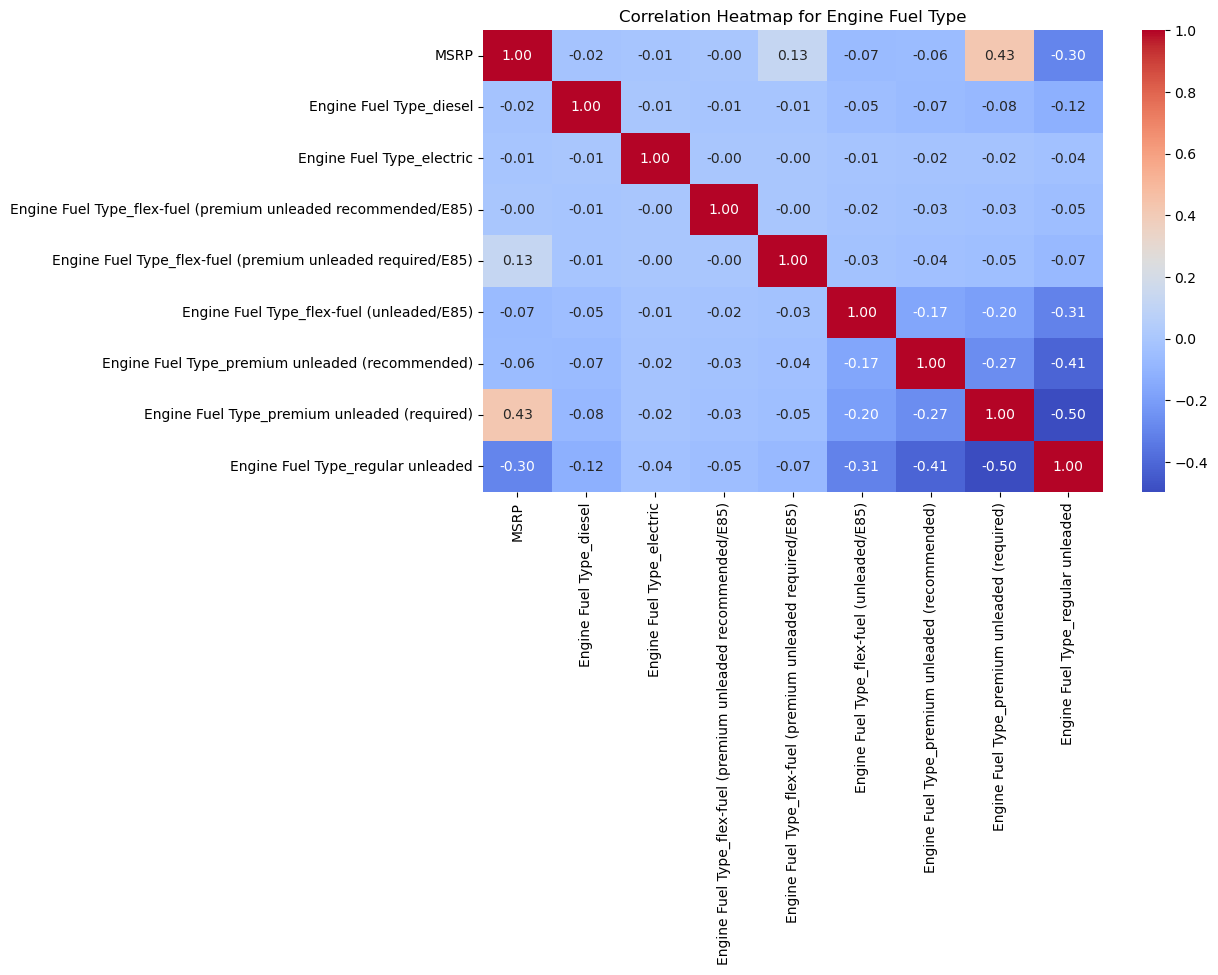

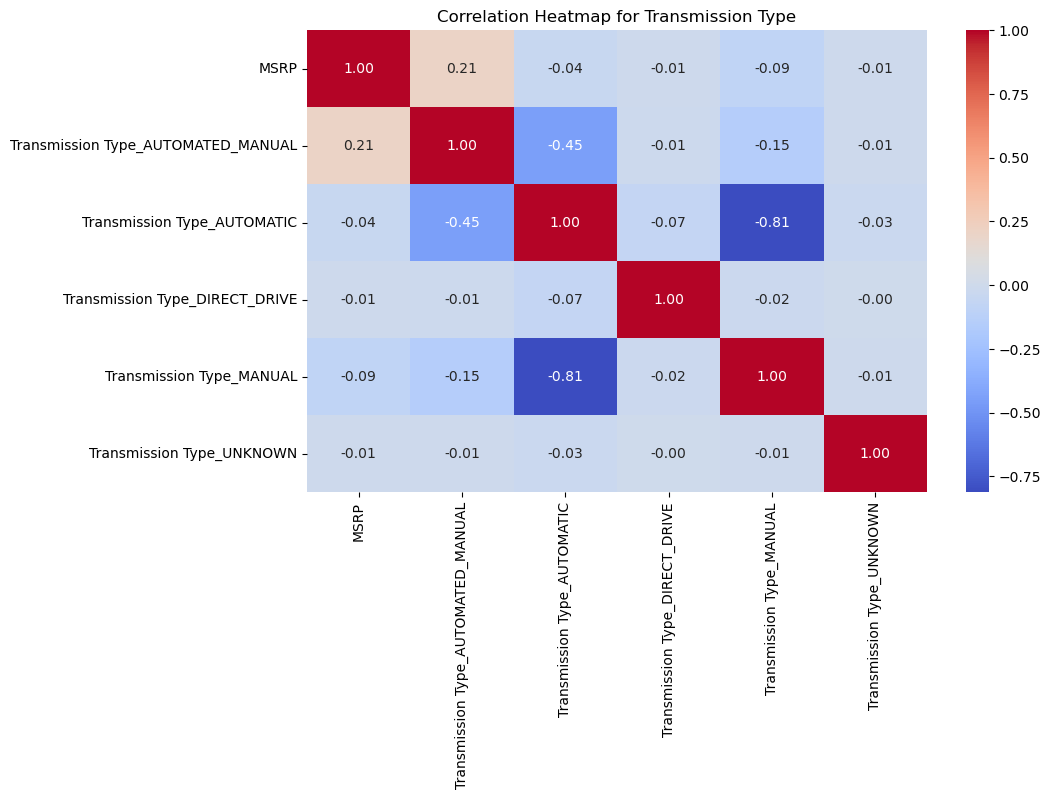

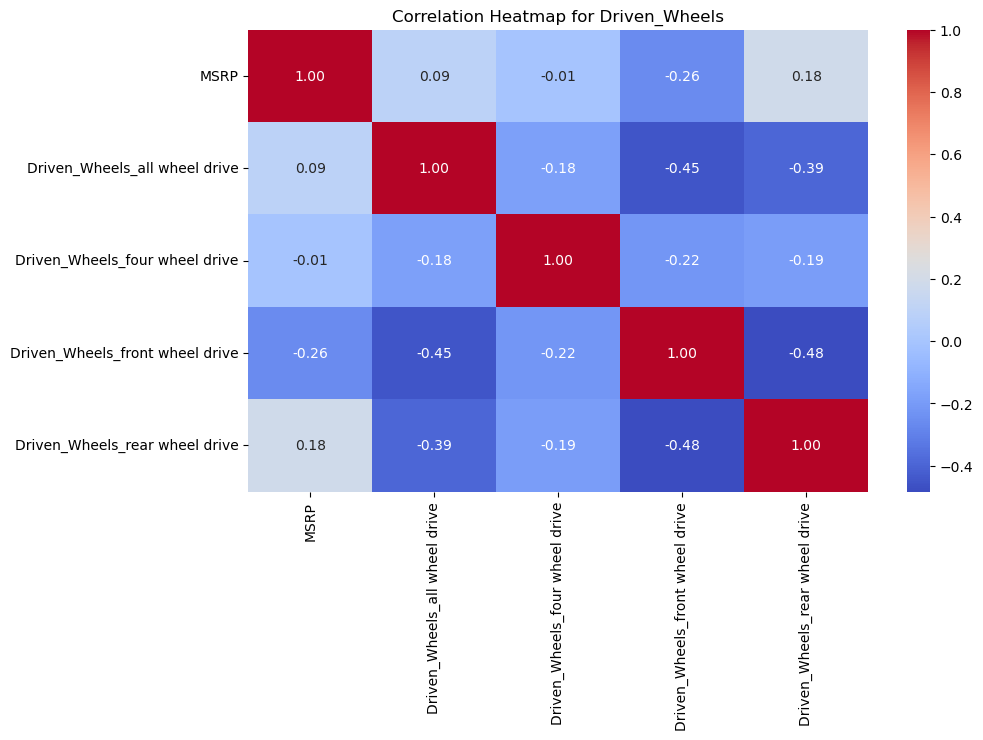

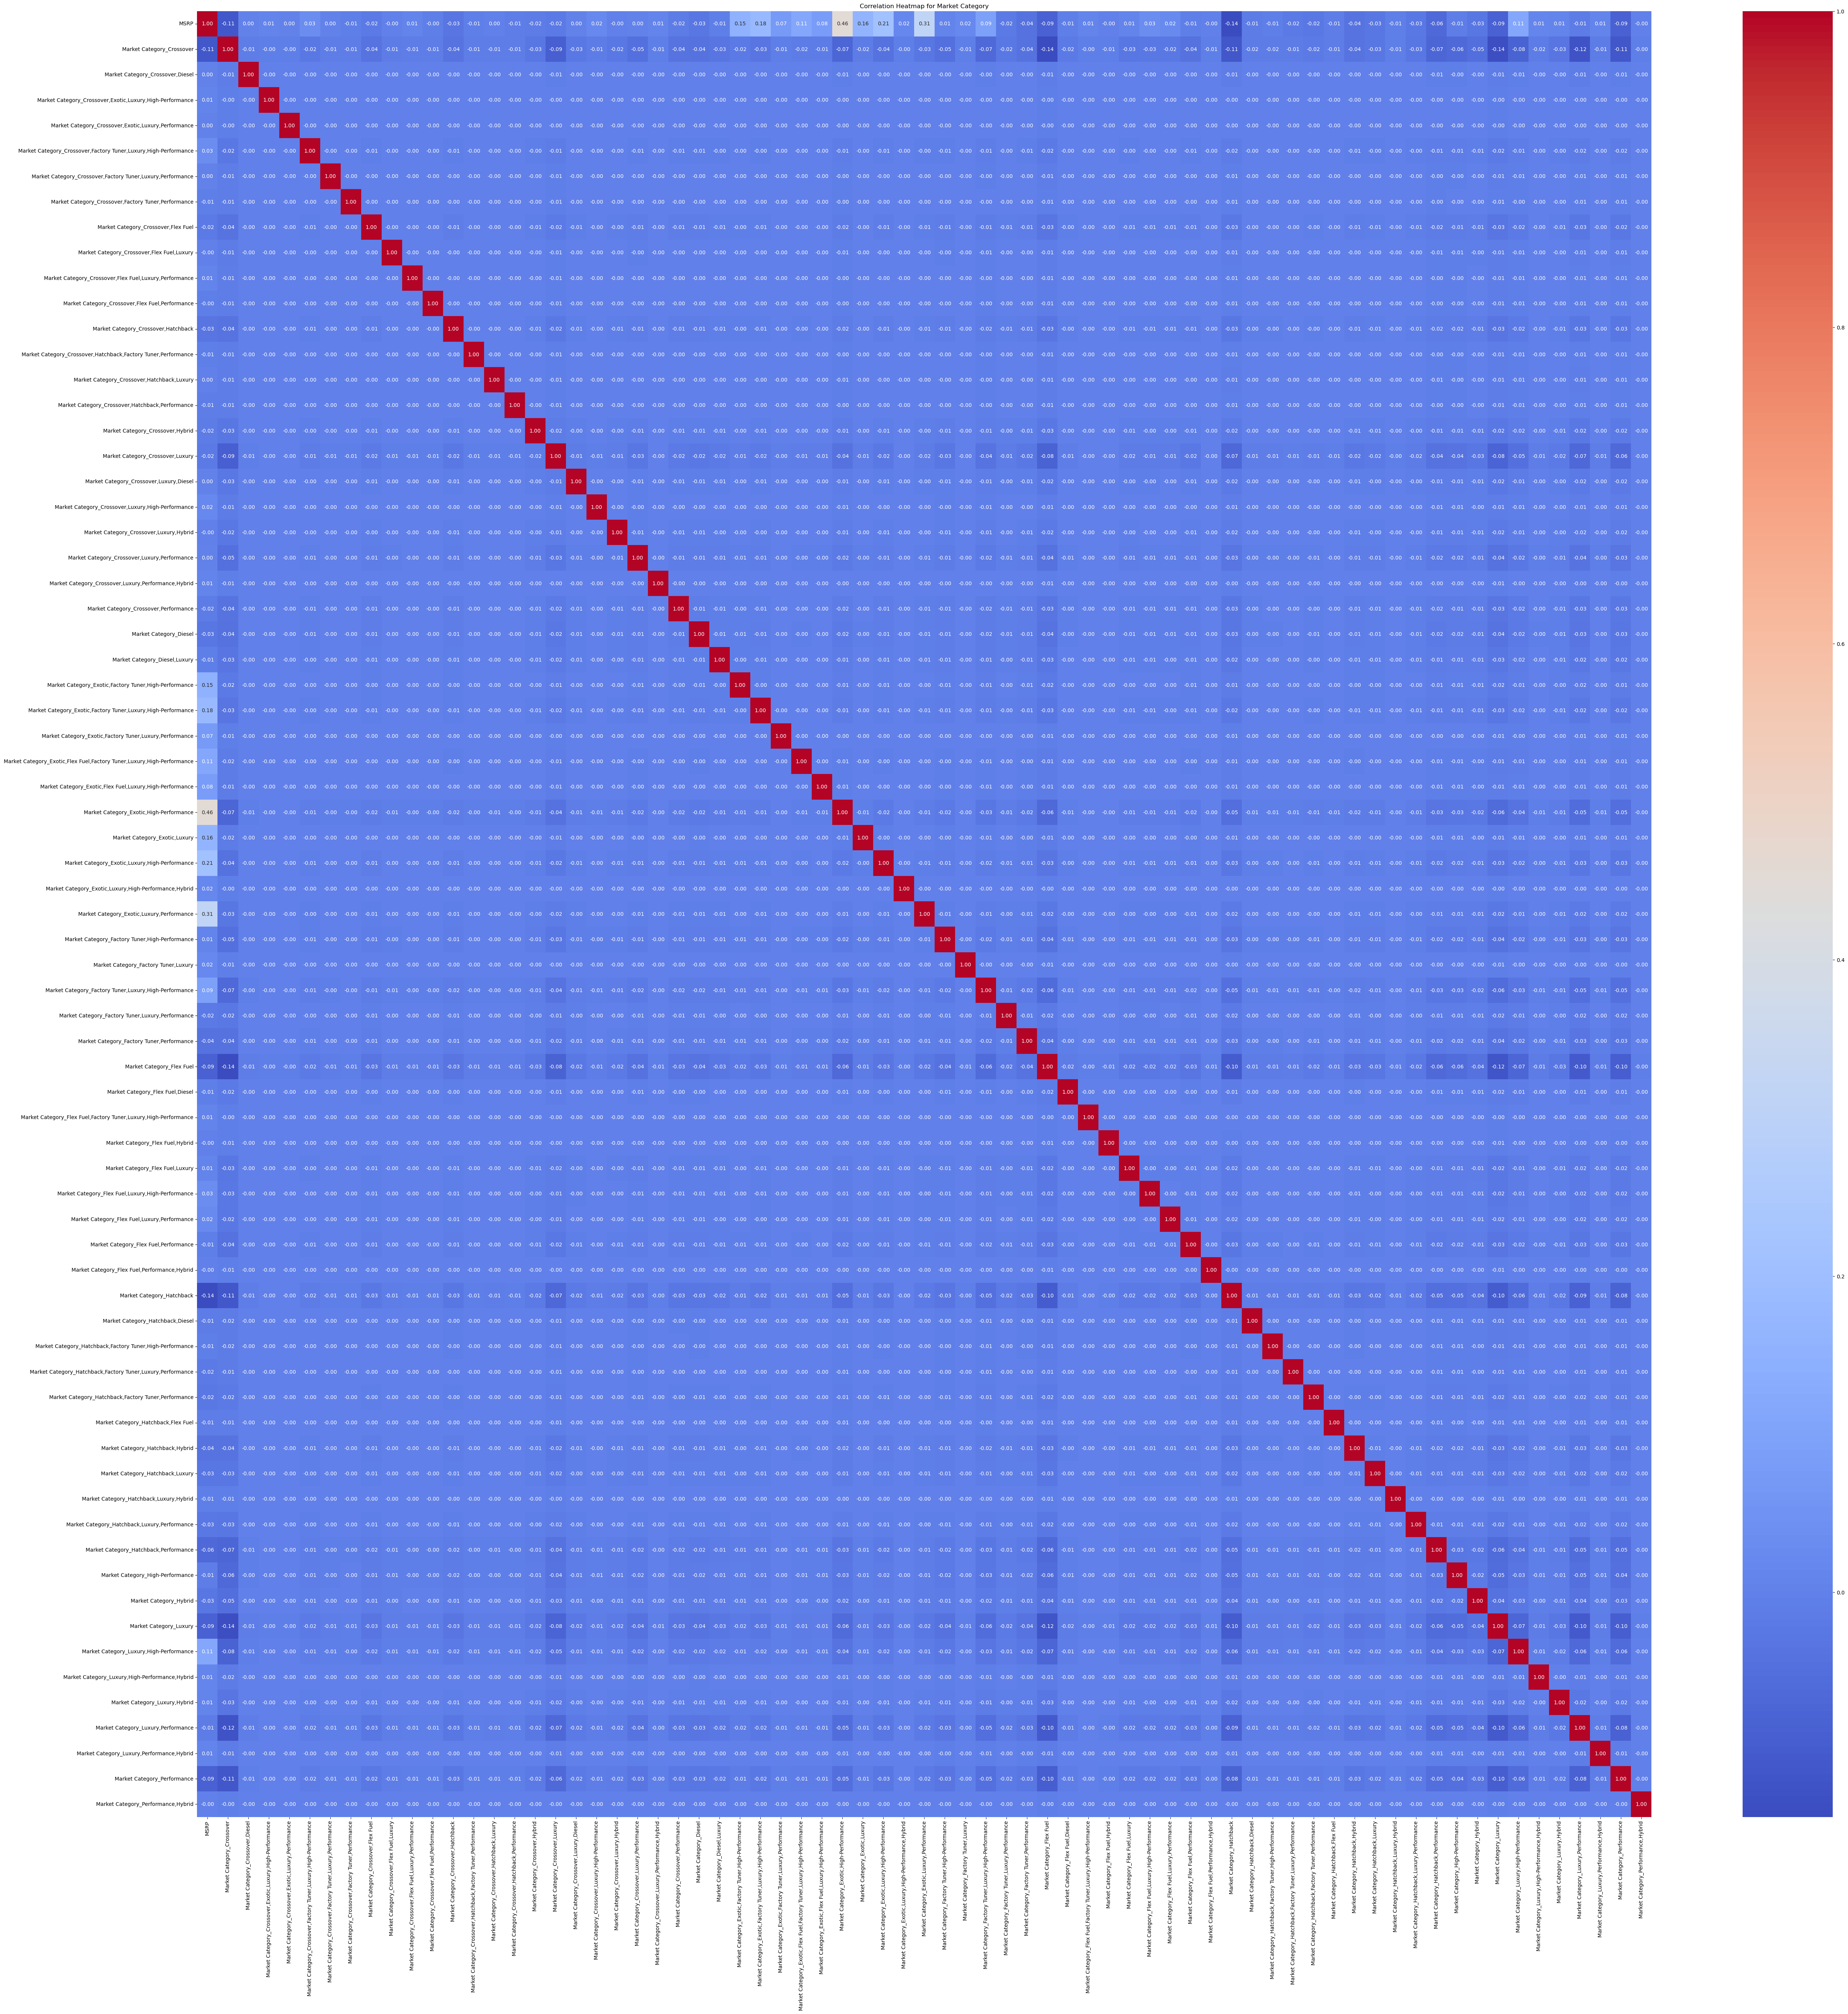

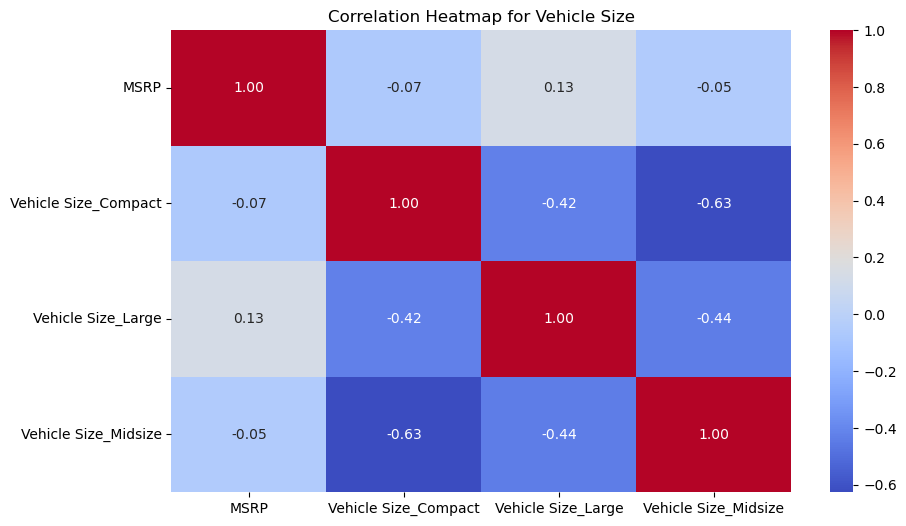

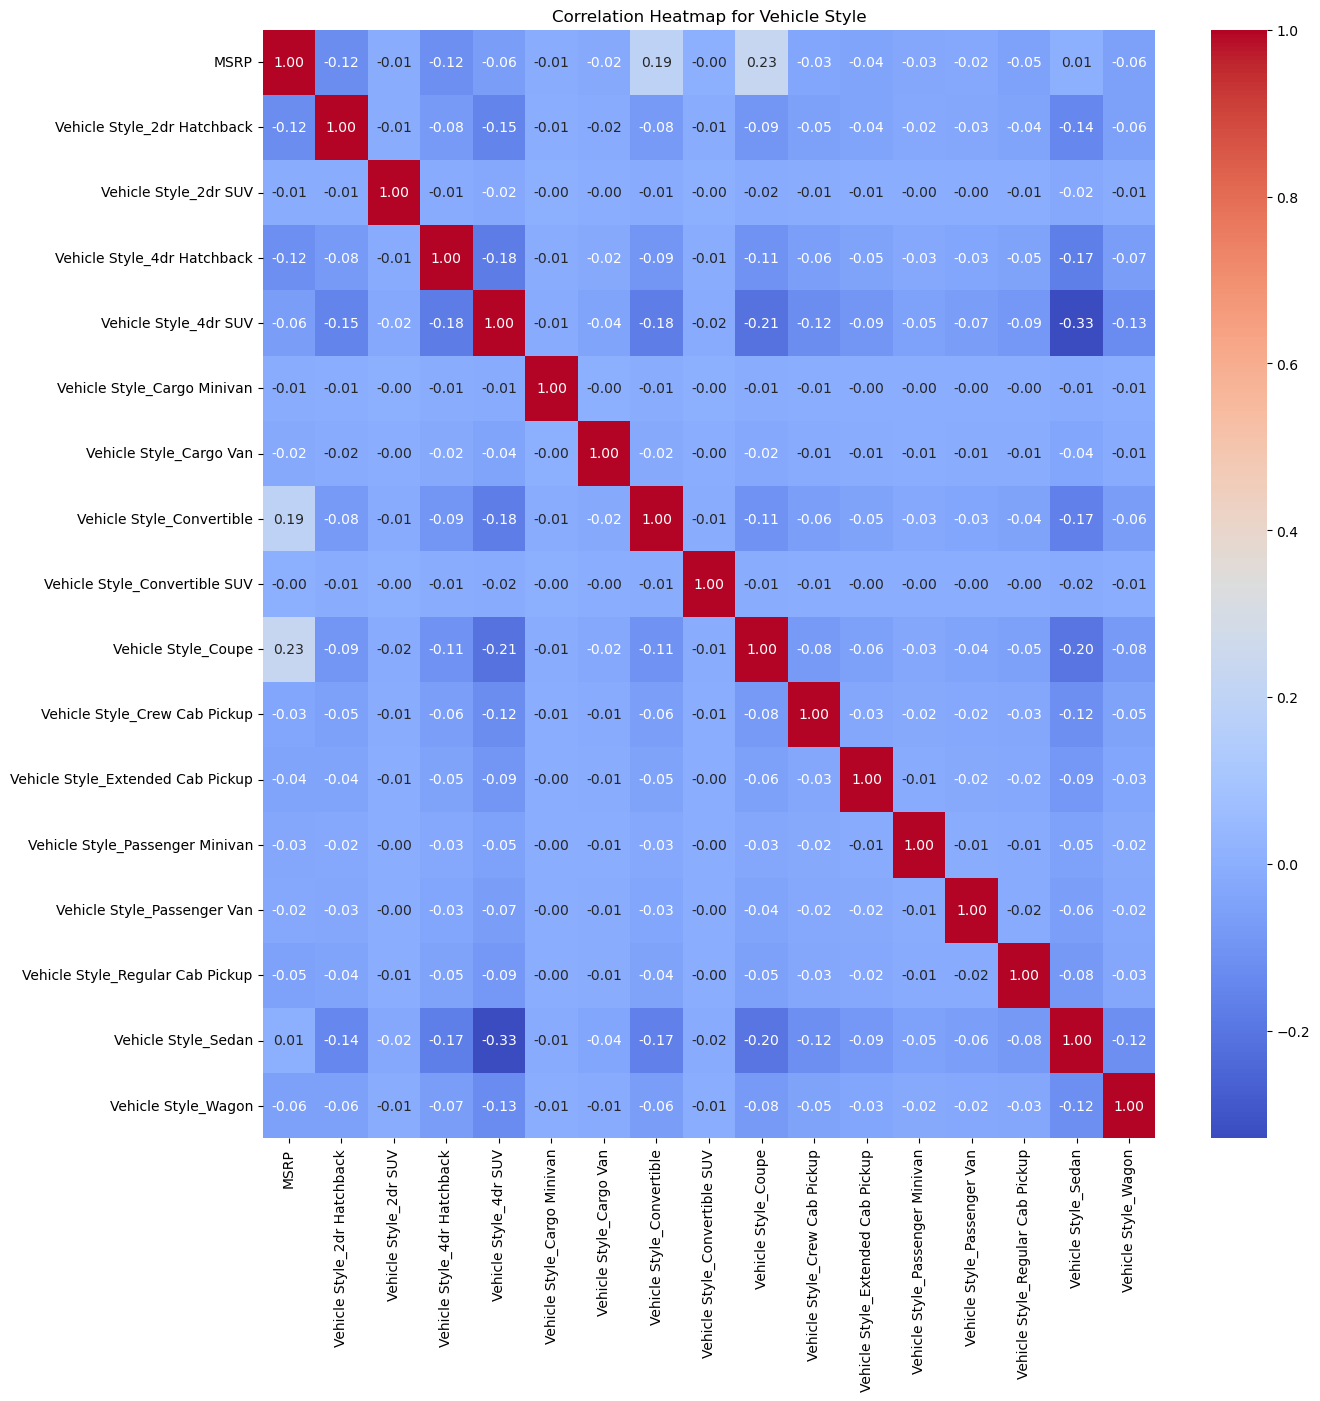

In [34]:
for x in cat_col_corr:
    if x != 'MSRP':
        cat_corr_plots(x, df=df, max_unique=80)

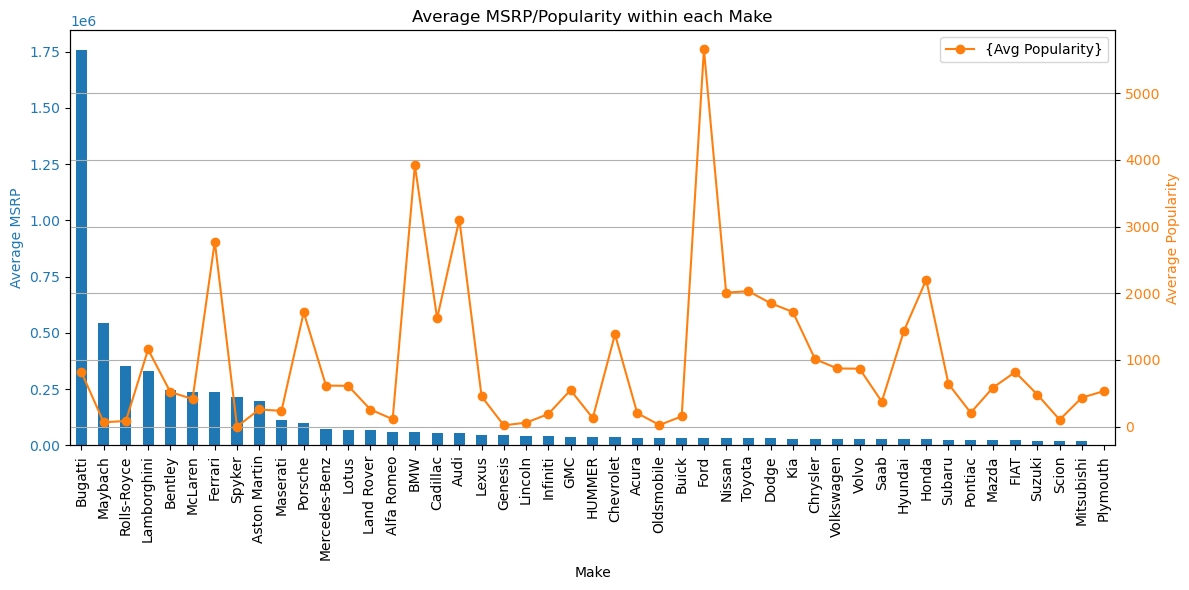

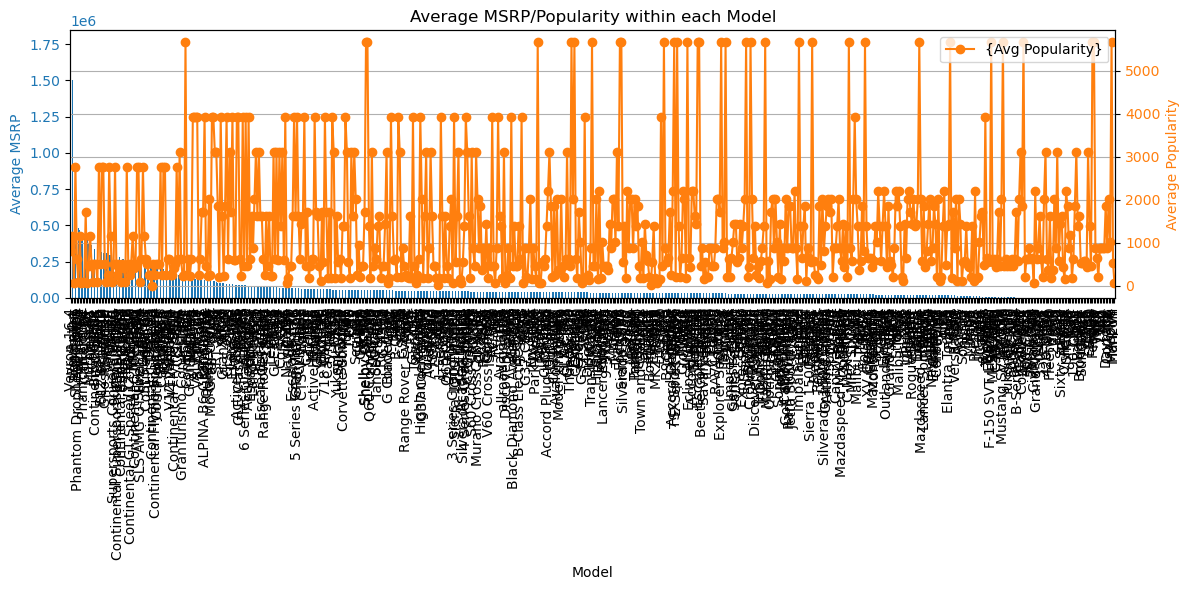

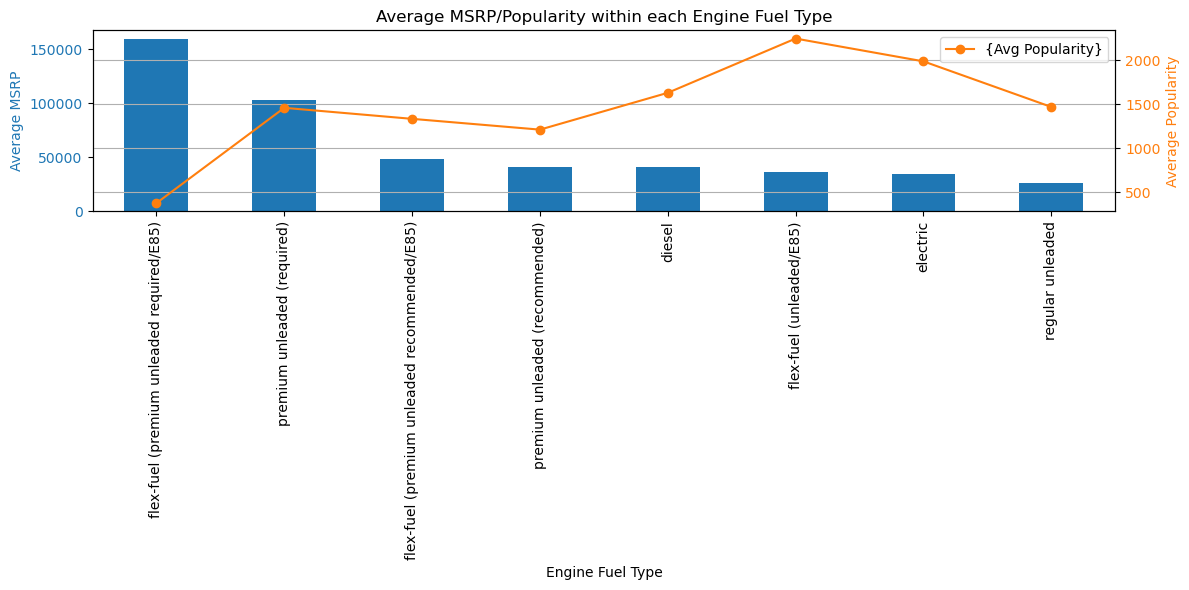

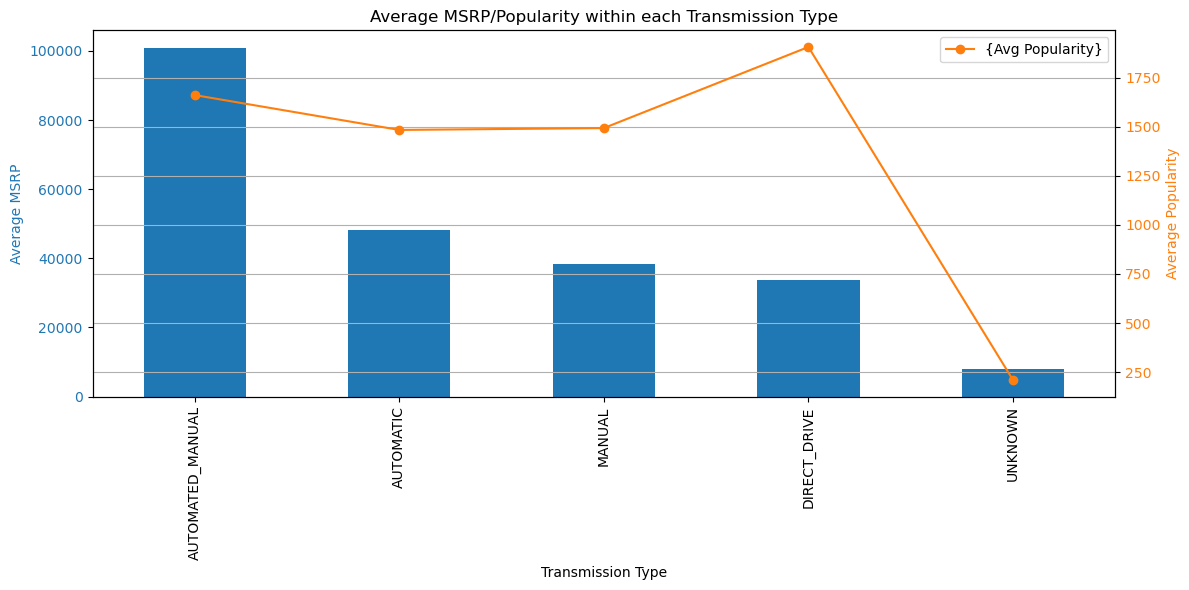

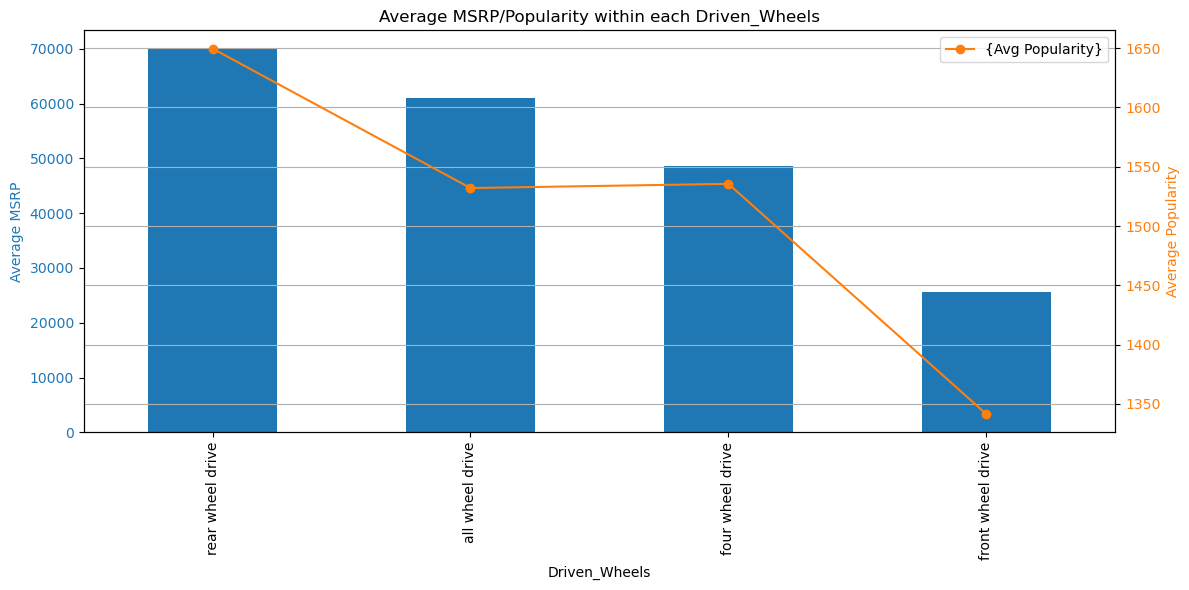

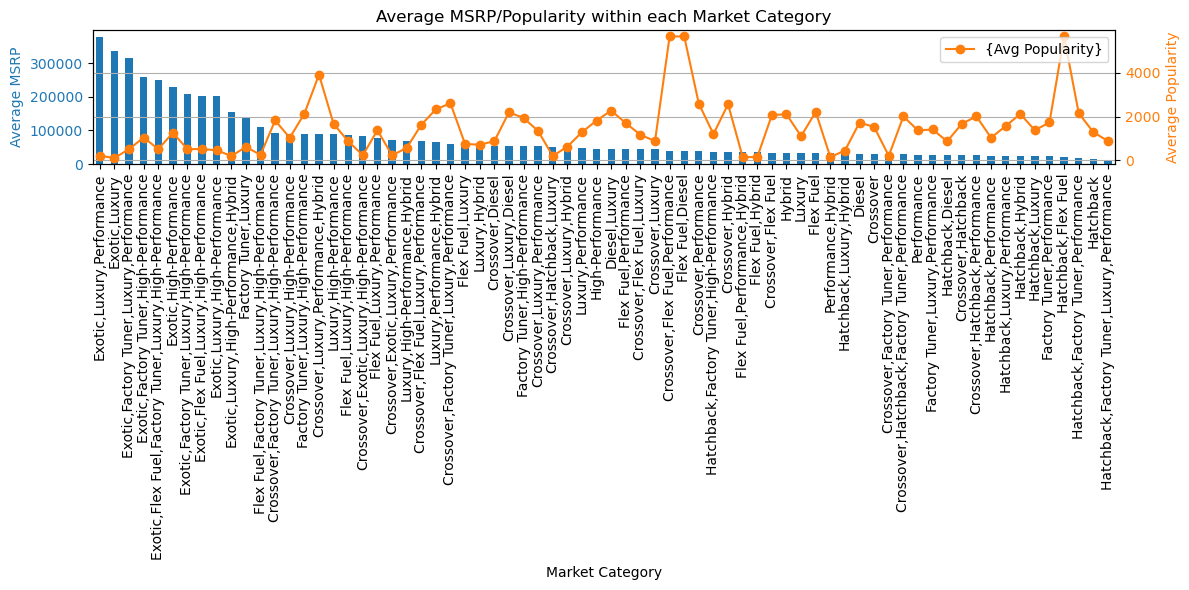

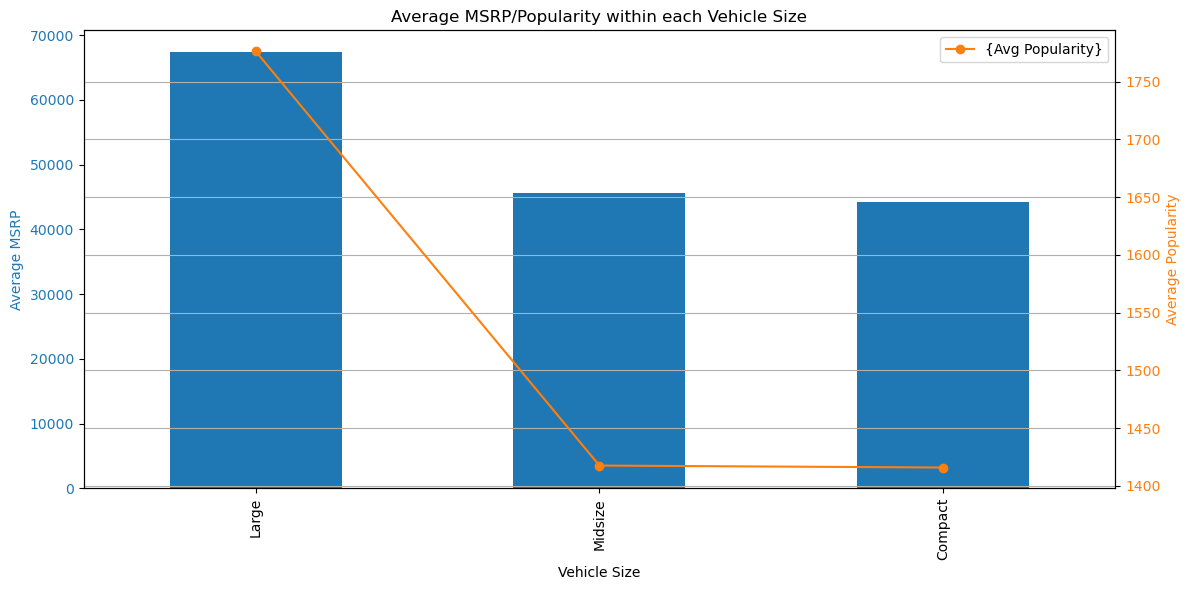

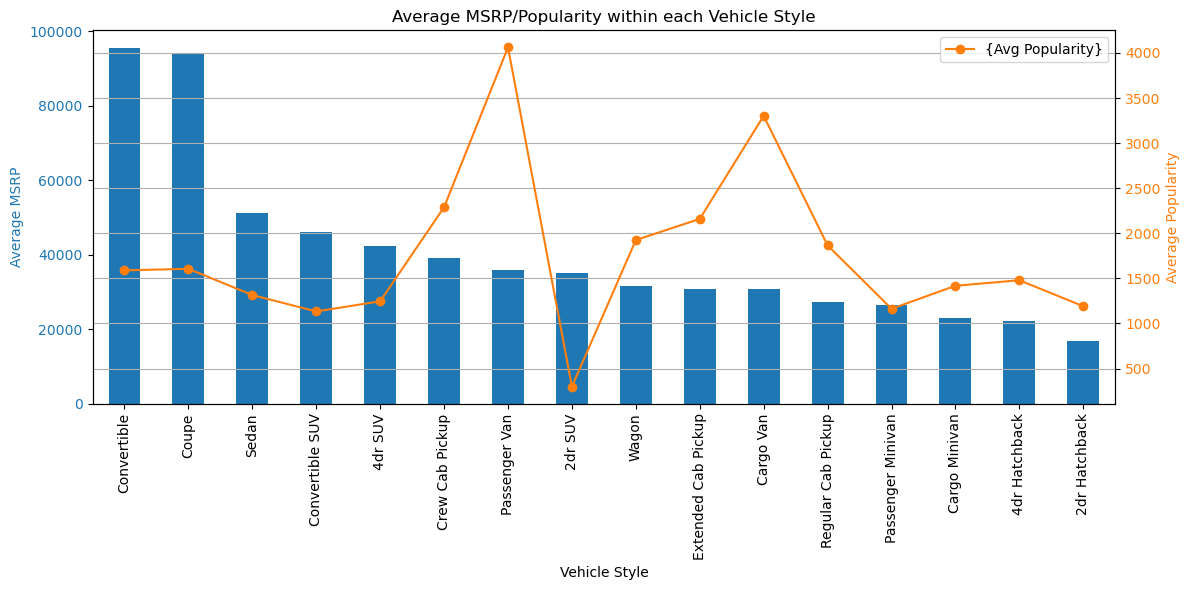

In [11]:
for x in cat_col:
    bar_line_graph(col=x, df=df)

In [13]:
from scipy.stats import linregress

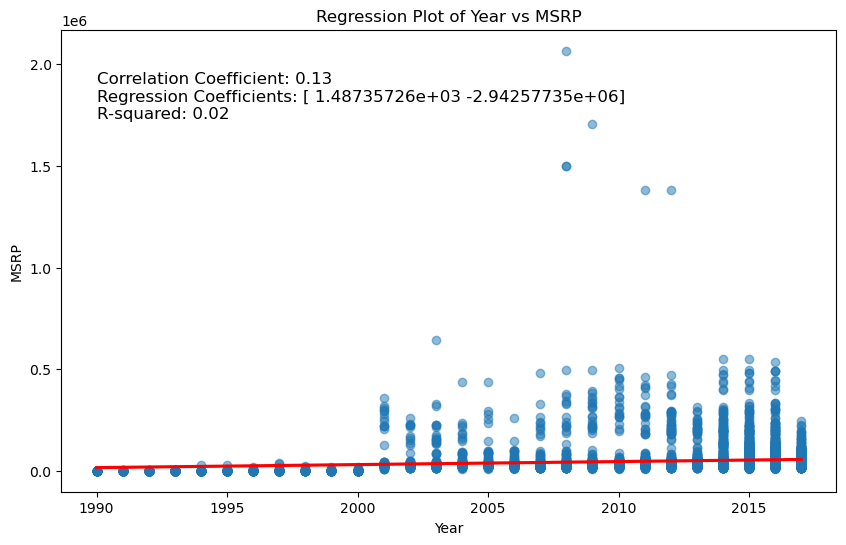

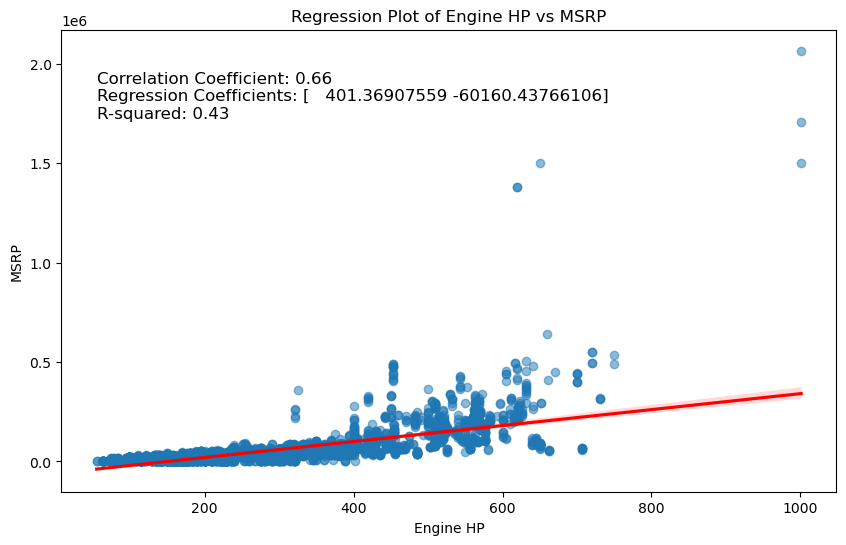

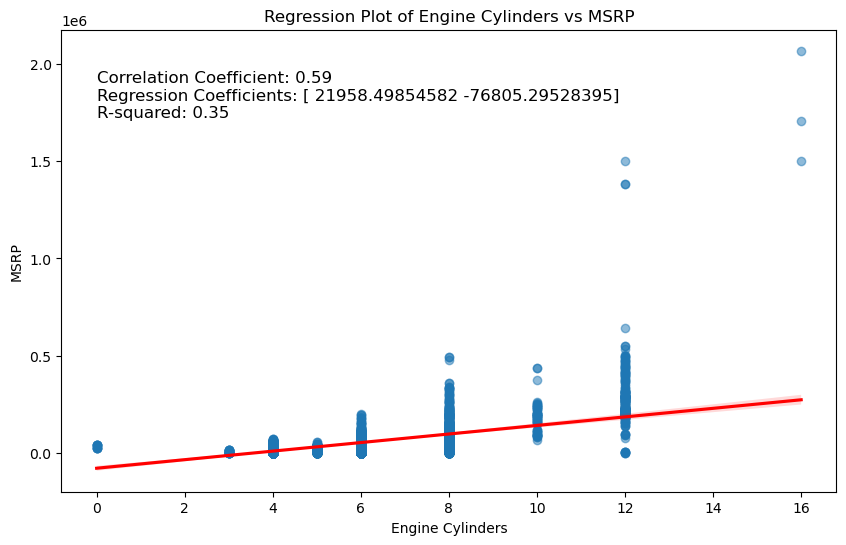

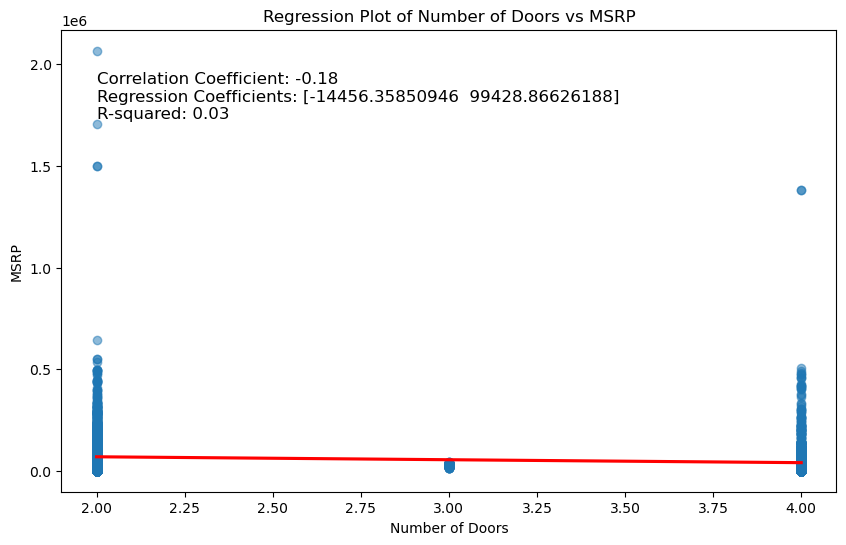

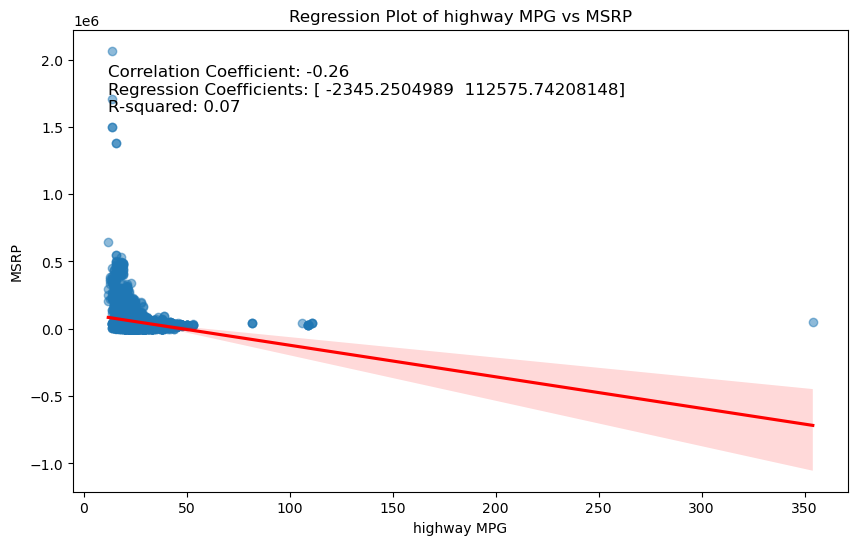

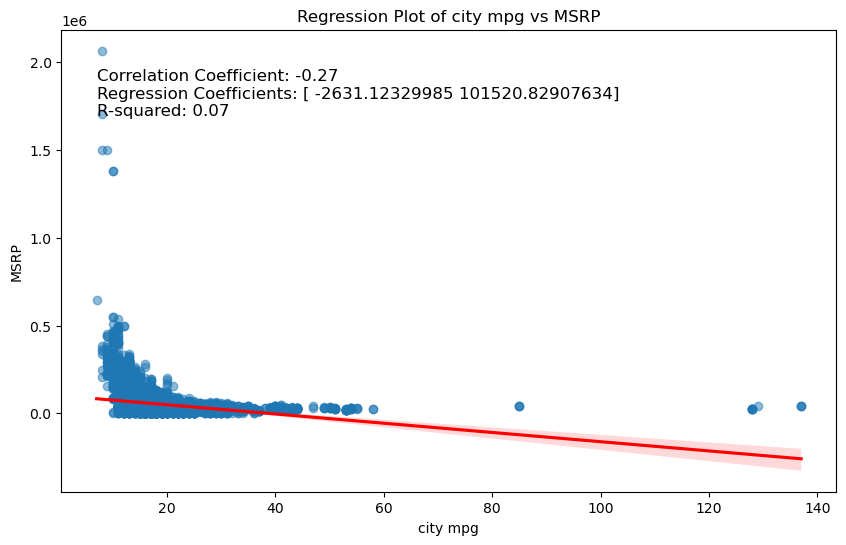

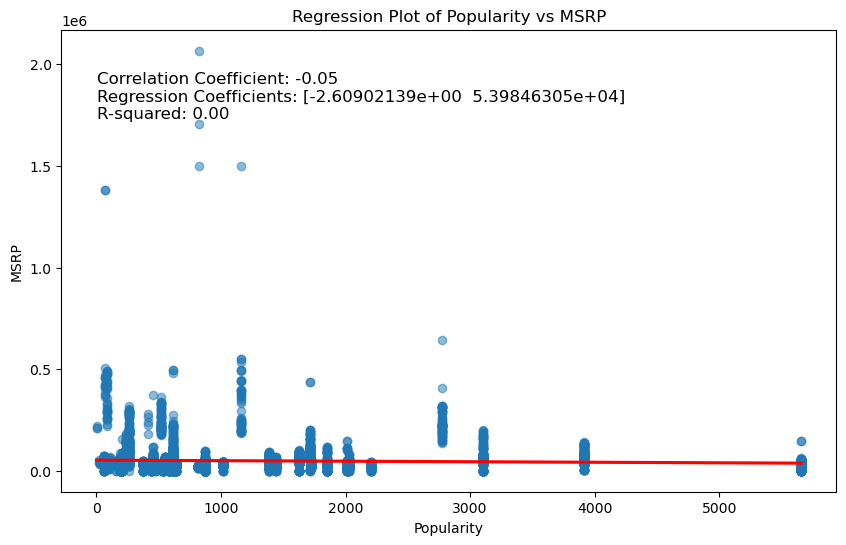

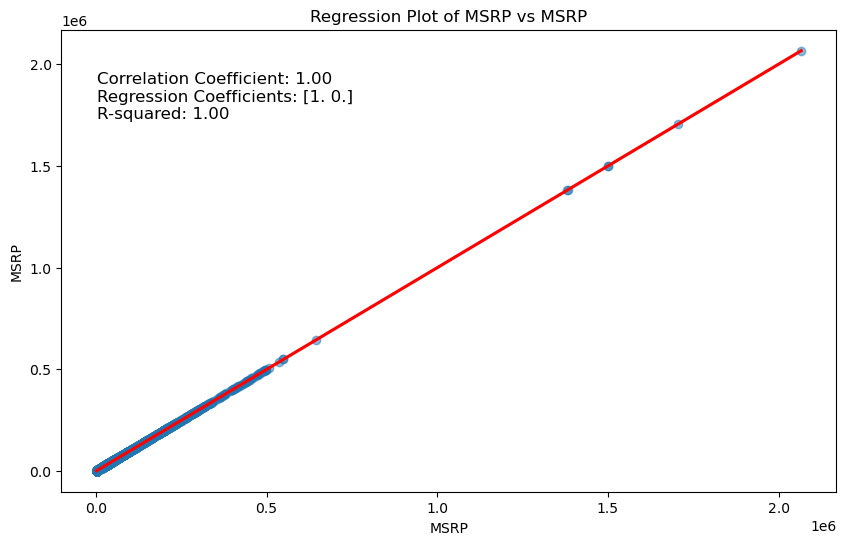

In [27]:
for x in num_col : 
    scatter_plots(col=x, df=df)